In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
obama_data = pd.read_csv('./barack_obama_deepfake_voice_export.csv')
trump_data = pd.read_csv('./donald_trump_deepfake_voice_export.csv')
sanders_data = pd.read_csv('./bernie_sanders_deepfake_voice_export.csv')
guinness_data = pd.read_csv('./alec_guinness_deepfake_voice_export.csv')
common_voice = pd.read_csv('./common_voice_export.csv')

obama_bona_fide = obama_data.iloc[:500,:]
obama_spoof = obama_data.iloc[500:,:]
trump_bona_fide = trump_data.iloc[:500,:]
trump_spoof = trump_data.iloc[500:,:]
sanders_bona_fide = sanders_data.iloc[:500,:]
sanders_spoof = sanders_data.iloc[500:,:]
guinness_bona_fide = guinness_data.iloc[:500,:]
guinness_spoof = guinness_data.iloc[500:,:]

common_voice.head()

,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.420296,2395.313798,2010.015320,0.114709,1764.573853,22.737518,4455.384498,473.543553,-369.460785,108.754082,...,23.355818,-0.769517,-11.537495,-3.588425,-9.612415,0.503762,-3.516332,-3.745388,-1.522713,male
1,0.344950,1262.095155,1264.673656,0.036212,7007.860840,20.076713,2189.094661,623.406615,-367.115662,130.169296,...,13.499375,-1.867014,13.503960,-3.363772,-2.069705,4.406932,-18.351679,-13.232059,-1.894985,male
2,0.565208,4167.961735,3805.325451,0.104360,368.941467,20.623177,8150.992299,851.642499,-339.008667,102.369614,...,-8.628662,29.446667,-17.978962,14.378601,-0.558806,-1.382019,-2.590462,5.881678,10.511349,male
3,0.391781,2742.610661,1951.070557,0.102079,1281.419312,21.361173,4543.056110,490.992872,-383.522125,123.523636,...,7.595569,-17.776217,14.339432,0.914608,-15.038569,4.608672,-3.263601,-9.664649,0.247904,male
4,0.339872,1904.902078,1597.256686,0.084758,2003.275024,23.243073,3375.374251,446.016749,-328.993408,104.970963,...,8.872935,7.306342,6.228225,-23.246098,-3.641305,-12.042892,-13.315507,8.476216,-9.004224,male


Join Tables

In [4]:
false_data_point_split = 20

obama_bona_fide_sample = obama_bona_fide.drop(columns=['label']).sample(n=(false_data_point_split * 8))
obama_spoof_sample = obama_spoof.drop(columns=['label']).sample(n=false_data_point_split)
trump_bona_fide_sample = trump_bona_fide.drop(columns=['label']).sample(n=false_data_point_split)
trump_spoof_sample = trump_spoof.drop(columns=['label']).sample(n=false_data_point_split)
sanders_bona_fide_sample = sanders_bona_fide.drop(columns=['label']).sample(n=false_data_point_split)
sanders_spoof_sample = sanders_spoof.drop(columns=['label']).sample(n=false_data_point_split)
guinness_bona_fide_sample = guinness_bona_fide.drop(columns=['label']).sample(n=false_data_point_split)
guinness_spoof_sample = guinness_spoof.drop(columns=['label']).sample(n=false_data_point_split)
common_voice_sample = common_voice.drop(columns=['label']).sample(n=false_data_point_split)

obama_bona_fide_sample = obama_bona_fide_sample.assign(label=[True for row in obama_bona_fide_sample.iterrows()])
obama_spoof_sample = obama_spoof_sample.assign(label=[False for row in obama_spoof_sample.iterrows()])
trump_bona_fide_sample = trump_bona_fide_sample.assign(label=[False for row in trump_bona_fide_sample.iterrows()])
trump_spoof_sample = trump_spoof_sample.assign(label=[False for row in trump_spoof_sample.iterrows()])
sanders_bona_fide_sample = sanders_bona_fide_sample.assign(label=[False for row in sanders_bona_fide_sample.iterrows()])
sanders_spoof_sample = sanders_spoof_sample.assign(label=[False for row in sanders_spoof_sample.iterrows()])
guinness_bona_fide_sample = guinness_bona_fide_sample.assign(label=[False for row in guinness_bona_fide_sample.iterrows()])
guinness_spoof_sample = guinness_spoof_sample.assign(label=[False for row in guinness_spoof_sample.iterrows()])
common_voice_sample = common_voice_sample.assign(label=[False for row in guinness_spoof_sample.iterrows()])

authentication_data = pd.concat(
    [
        obama_bona_fide_sample,
        obama_spoof_sample,
        trump_bona_fide_sample,
        trump_spoof_sample,
        sanders_bona_fide_sample,
        sanders_spoof_sample,
        guinness_bona_fide_sample,
        guinness_spoof_sample,
        common_voice_sample
    ],
    ignore_index=True, sort=False
)
authentication_data.reset_index()

authentication_data.head()


,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.426353,1810.380543,1578.146501,0.157678,283.000854,19.710961,3355.989583,259.842276,-382.715637,82.884056,...,0.582991,8.774030,-8.702086,-2.443599,-5.500515,-4.303791,-8.196462,-0.082581,-9.923220,True
1,0.385970,1583.652284,1465.618599,0.121477,82.348175,19.869919,2785.474537,381.842467,-333.525360,108.028961,...,-11.722439,2.985655,-13.746558,-19.114380,-3.369034,6.474177,-9.293153,-0.140038,-7.958003,True
2,0.362366,1042.728101,1232.047680,0.068723,34.212303,20.969318,1884.447674,281.826749,-419.018066,135.327820,...,-12.070319,-13.737990,-22.649067,-5.117201,-13.213385,-3.055938,-13.950408,-3.655073,-8.913670,True
3,0.342028,1755.130388,1597.597596,0.150817,46.293064,21.178304,3230.823864,257.861455,-375.291809,83.776535,...,-13.269975,-2.966602,-15.926501,-9.886530,-18.685411,-5.533156,-14.003848,0.351655,-6.987904,True
4,0.434757,1709.765494,1636.886924,0.142422,266.566467,19.605117,3289.713542,297.635057,-314.518707,100.329300,...,-6.172733,-6.287617,-20.384415,-12.828840,-10.339002,-6.733177,-6.092376,2.260912,-13.155663,True


In [5]:
authentication_data_missing_values = authentication_data.isnull().sum()

print("Columns with missing values:")
authentication_data_missing_values

Columns with missing values:


chroma       0
centroid     0
bandwidth    0
zcr          0
energy       0
contrast     0
rolloff      0
pitch        0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
label        0
dtype: int64

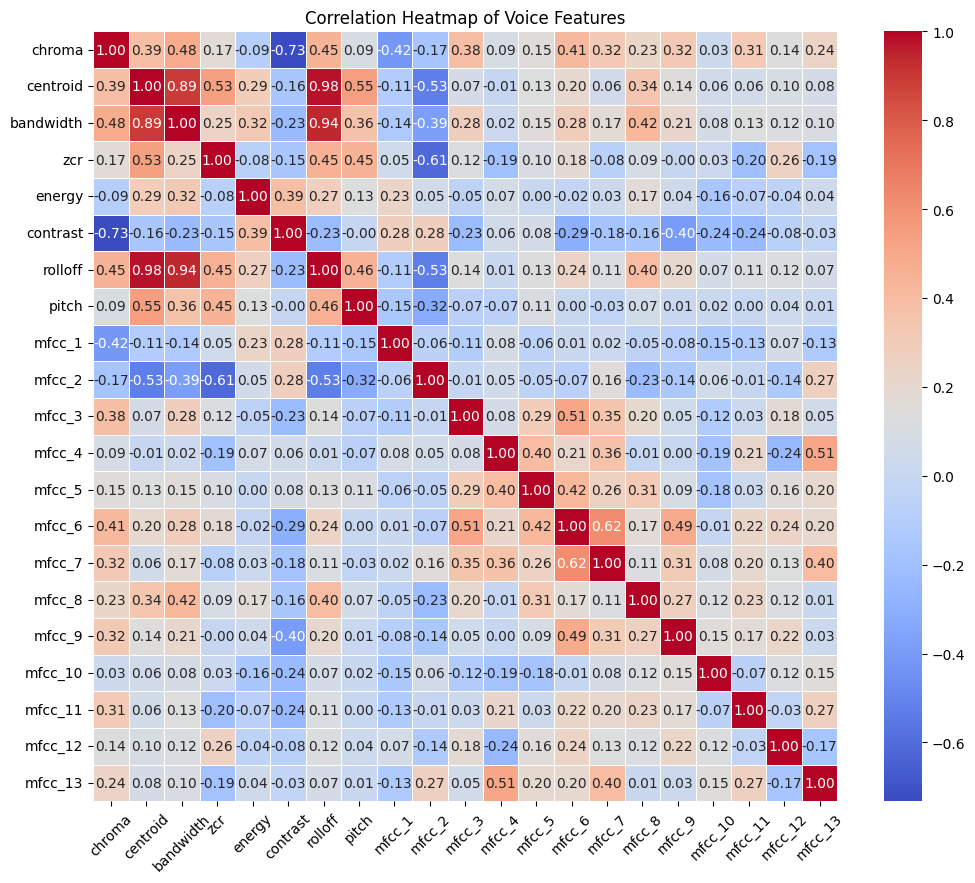

In [6]:
## Data visualization 
# correlation matrix

import seaborn as sns

authentication_data_numeric_columns = authentication_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = authentication_data[authentication_data_numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Voice Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [7]:
## X and Y data
X = authentication_data.drop(columns=["label"], axis=1)
Y = authentication_data["label"]

In [8]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (320, 21)
Shape of Y: (320,)


In [9]:
## Data Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.preprocessing import LabelEncoder

## Encoding of labeled data
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

print("Original classes:", label_encoder.classes_)

Original classes: [False  True]


In [11]:
## Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC
from sklearn import metrics

# kernels = ['rbf', 'linear', 'sigmoid', 'poly']

## SVM Model 
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print('Accuracy Score : %0.4f' % metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score : 0.9531


Confusion Matrix

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



<Axes: >

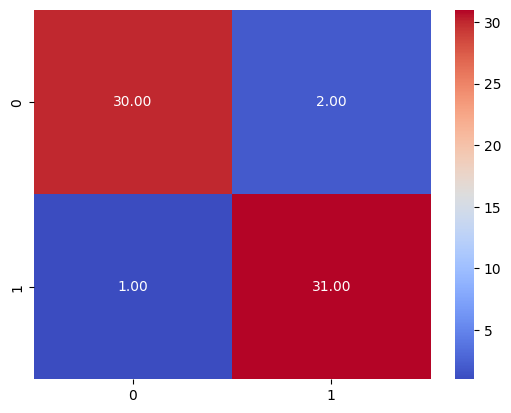

In [13]:
confusion = metrics.confusion_matrix(Y_test, Y_pred)
classification = metrics.classification_report(Y_test, Y_pred)
print(classification)
sns.heatmap(confusion , annot = True, cmap="coolwarm", fmt=".2f")

In [14]:
#neural networks trial

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.01)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

mlp.score(X_test, Y_test)

1.0

In [15]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsClassifier()

k_range = list(range(1, 101))
weight_options = ['uniform', 'distance']

param_dist = dict(n_neighbors=k_range, weights=weight_options)

knn = RandomizedSearchCV(estimator=model, cv=10, param_distributions=param_dist, n_iter=10)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
print("KNN Accuracy (k={}): {}".format(knn.best_params_['n_neighbors'], knn.best_score_))

KNN Accuracy (k=12): 0.8523076923076923


In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


learning_rate = 0.001
epochs = 20
batch_size = 64

num_classes = len(label_encoder.classes_)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

# Initialize the model
model = NeuralNetwork(input_size=X_train.shape[1], num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == Y_test_tensor).sum().item() / len(Y_test_tensor)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.953125


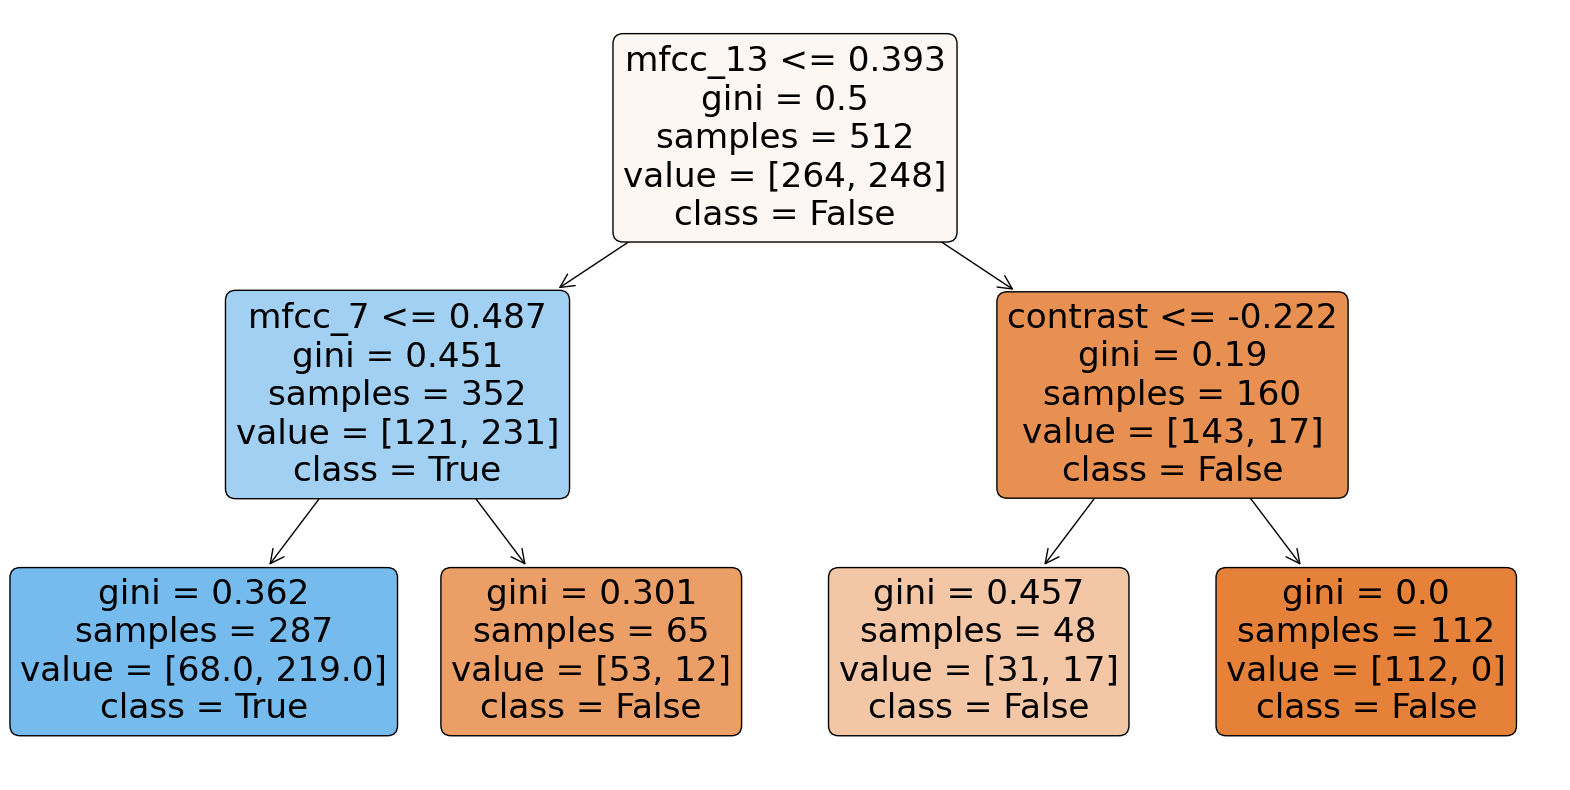

Accuracy: 80.47%


In [65]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

# Initialize Decision Tree
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X_train, Y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

plt.figure(figsize=(20,10))
string_classes = [str(label_encoder.classes_[0]), str(label_encoder.classes_[1])]
plot_tree(clf, filled=True, feature_names=authentication_data_numeric_columns, class_names=string_classes, rounded=True)
plt.show()
print(f"Accuracy: {accuracy * 100:.2f}%")